**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

# 1. Data Exploration

 ## 1.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', None)

## 1.2 Loading Data

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
19489,19490,LTU,43.0,1046,0x9C622AD09E9FAF120E219D222AA7B338D9701CEED3A8...,0xBC47B5830786943ADA63570502195A9015335E27E8EC...,222,278.10,120.5,0,0,1,9,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
99189,99190,PRT,56.0,138,0x21F4CD844B7C91B79D8AB8B987CA3F7A116B6C7F9574...,0x0BE01F04ABA72D4619620DCE97EC592BD4D70421A61F...,106,1275.00,14.0,0,0,1,7,7,Direct,Direct,0,0,0,0,0,0,0,1,0,0,0,0,0
82483,82484,FRA,63.0,304,0x892CAE786D8D13BD69943D54A9310EB45B6C8FF990E2...,0xCA6CE013950814BD70A736B7A349BE28063637218CF9...,196,211.22,221.5,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
61851,61852,GBR,41.0,474,0x8ABDFE864965A79181B8FA3EFDD85AD4B95E2129FF42...,0x7194AD4679C94308E269EB505BC0166315F2E8B88E2A...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
9884,9885,PRT,NaN,1194,0x36773B8ABA6CBC922450FDC4055CCEB4162B52E1D54E...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3,139.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


# Data analysis

In [5]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   AverageLeadTime       111733 non-null  int64  
 4   LodgingRevenue        111733 non-null  float64
 5   OtherRevenue          111733 non-null  float64
 6   BookingsCanceled      111733 non-null  int64  
 7   BookingsNoShowed      111733 non-null  int64  
 8   BookingsCheckedIn     111733 non-null  int64  
 9   PersonsNights         111733 non-null  int64  
 10  RoomNights            111733 non-null  int64  
 11  DistributionChannel   111733 non-null  object 
 12  MarketSegment         111733 non-null  object 
 13  SRHighFloor           111733 non-null  int64  
 14  SRLowFloor            111733 non-null  int64  
 15  SRAcc

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


## Age
`Age:` <br>
Has missing values; <br>
Average age is 45 years; <br>
Min is -10; <br>
Max is 123.

Actionables: Deal with missing values, plot age distribution, check cases where age is negative, check cases where age is above 100. <br>


**TO DO: Create bins with age segments.**

In [8]:
# Display rows for missing values in age column
data[data['Age'].isnull()].sample(5)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
10841,PRT,NaN,1179,104,496.8,89.0,0,0,1,12,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
6514,PRT,NaN,1246,2,244.0,106.0,0,0,1,8,4,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10185,PRT,NaN,1189,133,1077.3,189.0,0,0,1,9,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
63768,PRT,NaN,460,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
37026,PRT,NaN,756,0,178.0,33.5,0,0,1,2,1,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
# Check age correlation with other columns 
data.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.261786
BookingsCheckedIn       0.146982
RoomNights              0.139599
DaysSinceCreation       0.127568
PersonsNights           0.120793
OtherRevenue            0.118851
LodgingRevenue          0.061177
SRTwinBed               0.050583
SRNearElevator          0.013616
SRLowFloor              0.012960
SRShower                0.008962
BookingsCanceled        0.008759
SRQuietRoom             0.008154
SRAwayFromElevator      0.007683
BookingsNoShowed        0.007069
SRAccessibleRoom        0.004509
SRMediumFloor           0.003319
SRNoAlcoholInMiniBar   -0.011765
SRHighFloor            -0.021887
SRBathtub              -0.022021
SRKingSizeBed          -0.025645
SRCrib                 -0.136364
Name: Age, dtype: float64

Our goal by checking this correlation was to see if any variable was correlated with age enough, that we could use in a predictive model to predict age. Since the highest correlated variable is 26% correlation, we discarded this idea, and just assumed to input median.

In [10]:
# Check cases where age is negative
print(f'There are {len(data[data['Age'] < 0])} cases where age is negative')
data[data['Age'] < 0]

There are 14 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0


All rows with negative values for age have in common DistributionChannel = 'Travel Agent/Operator', and are between [-10, -5].


In [11]:
# Drop rows where ID = 2053 AND 2469 as all columns are zeros and age is negative
data.drop([2053, 2469], inplace=True)

In [12]:
# Check cases where age is above 100
print(f'There are {len(data[data['Age'] > 100])} cases where age is above 100')
data[data['Age'] > 100]

There are 9 cases where age is above 100


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.0,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,215,140.0,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,7,492.0,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,7,234.0,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,2,266.0,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
64256,ESP,110.0,456,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1
87089,PRT,111.0,244,18,210.0,52.0,0,0,1,4,2,Direct,Direct,1,0,0,0,0,0,0,1,0,0,0,0,0


We will drop the person with ID: 53298 (age 123) because it has zero on all values. So even if it is a real person, it just doesn't add any value to our segmentation.

In [13]:
# Drop row with id = 53298
data.drop(53298, inplace=True)

In [14]:
# Turn the remaining rows with age below 0 to NaN
data.loc[data['Age'] < 0, 'Age'] = np.nan

In [15]:
# Fill missing values with median
data['Age'].fillna(data['Age'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_31779/2581834537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [16]:
# check for missing values in age
print(f'There are {data["Age"].isnull().sum()} missing values left in Age column')

There are 0 missing values left in Age column


## Nationality

Key take aways:
- Nationality is a categorical variables that has high cardinality, with 199 classes (199 different nationalities);
- The top20 of those nationalities by frequency represent ~91% of the total customers;
- The top nation is France, with 16516 customers, accounting for ~15% of total customers;
- There are 96 nationalities with less than 10 occurrences; <br>
`Nationality has a correlation with LodgingRevenue of 0.97`

Next steps:

Multivariate analysis:
- Revenue Contribution: Analyze how customers from different nationalities contribute to LodgingRevenue and OtherRevenue.
- Booking Behavior: Check differences in AverageLeadTime, BookingsCanceled, BookingsNoShowed, and BookingsCheckedin based on nationality.
- Stay Patterns: Compare PersonNights and RoomNights across nationalities.
- Market Segment & Distribution Channel: Determine if certain nationalities book more through specific channels or belong to particular segments.

A/B Test Grouping countries by: <br>
- Geographic region (e.g., Western Europe, North America, etc.) <br>
- Economic factors (e.g., GDP, GDP/capita)

In [17]:
# Put the top20 nationalities in a list
top20_nationalities = data['Nationality'].value_counts().head(20).index.tolist()
print(f'The top 20 nationalities are {top20_nationalities}.')

The top 20 nationalities are ['FRA', 'DEU', 'PRT', 'GBR', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD', 'IRL', 'CHE', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'NOR', 'POL', 'AUS'].


In [18]:
# Get the value counts for each nationality
nationality_counts = data['Nationality'].value_counts()

# Get the total count of all nationalities
total_count = nationality_counts.sum()

# Compute the percentage representation of the top 20 nationalities
top20_percentages = round((nationality_counts.loc[top20_nationalities] / total_count) * 100,2)

# Display the results in a DataFrame
top20_df = pd.DataFrame({'Nationality': top20_nationalities, 'Percentage': top20_percentages.values})

top20_df

,Nationality,Percentage
0,FRA,14.78
1,DEU,13.25
2,PRT,12.62
3,GBR,10.26
4,ESP,5.48
5,USA,4.84
6,ITA,3.82
7,BEL,3.68
8,BRA,3.61
9,NLD,3.40


In [19]:
nationality_counts.loc[top20_nationalities]

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
USA     5409
ITA     4267
BEL     4111
BRA     4037
NLD     3794
IRL     2938
CHE     2686
CAN     2192
AUT     1949
SWE     1687
ISR     1149
CHN     1147
NOR     1055
POL     1035
AUS     1022
Name: count, dtype: int64

In [20]:
# Sum the percentages in the top 10 nationalities
top20_marketshare = top20_df['Percentage'].sum()
print(f'The top 20 nationalities represent {round(top20_marketshare,2)}% of the total market share')

The top 20 nationalities represent 90.82% of the total market share


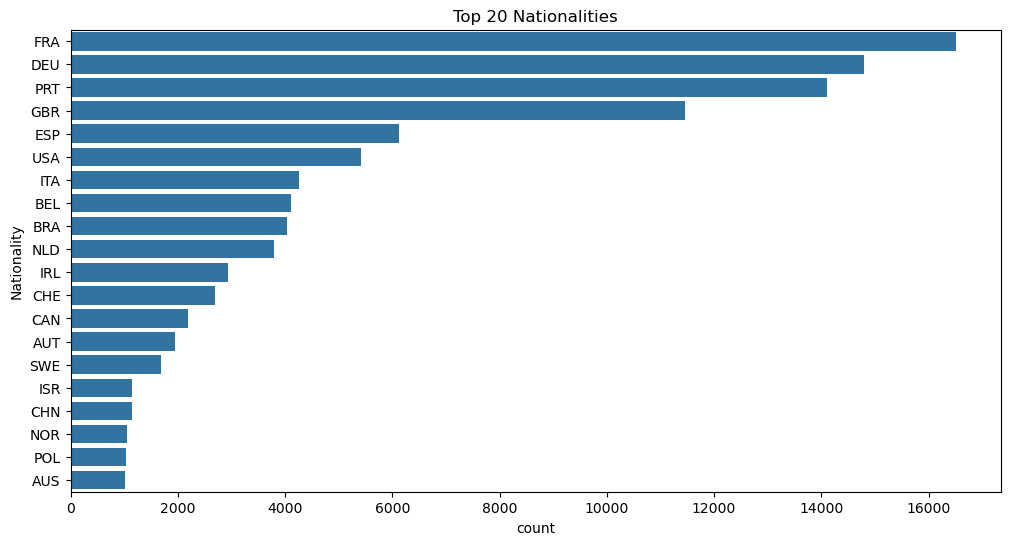

In [21]:
# Plot the top20 nationalities
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Nationality', order=top20_nationalities)
plt.title('Top 20 Nationalities')
plt.show()

In [22]:
# check how many nationalities have less than 10 occurrences
nationalities_less_than_10 = nationality_counts[nationality_counts < 10].index
print(f'There are {nationalities_less_than_10.shape[0]} nationalities with less than 10 occurrences')

There are 96 nationalities with less than 10 occurrences


In [23]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [24]:
# check for correlation between nationality and other columns
data.select_dtypes(include=[np.number]).corr()['TotalRevenue'].sort_values(ascending=False)

TotalRevenue            1.000000
LodgingRevenue          0.972366
RoomNights              0.717433
PersonsNights           0.703531
OtherRevenue            0.697866
BookingsCheckedIn       0.453681
AverageLeadTime         0.285230
DaysSinceCreation       0.116097
Age                     0.080664
BookingsCanceled        0.069964
BookingsNoShowed        0.064957
SRQuietRoom             0.045257
SRKingSizeBed           0.015205
SRHighFloor             0.014615
SRAwayFromElevator      0.012430
SRShower                0.010321
SRMediumFloor           0.005267
SRLowFloor              0.003634
SRBathtub               0.003529
SRNearElevator          0.002609
SRAccessibleRoom        0.000399
SRNoAlcoholInMiniBar   -0.000877
SRTwinBed              -0.004446
SRCrib                 -0.019694
Name: TotalRevenue, dtype: float64

## DaysSinceCreation

**Definition:** Number of days since the customer was created in the system. <br>
**Relevance:** Indicates customer tenure or loyalty, as older customers may behave differently from newer ones.


Insights:
- No missing values
- Statistical insights: Min is 36 day, max is 1385 days. Average is 595 days.
- From the distribution, it looks to be a cyclical trend, that after 8 months there's a low in new customer registering to the system. Probably show a seasonal trend.
- There's also an overall negative trend in new customers over time.

In [25]:
# Check for missing values
data['DaysSinceCreation'].isnull().sum()

0

In [26]:
data['DaysSinceCreation'].describe()

count    111730.000000
mean        595.014061
std         374.649771
min          36.000000
25%         288.000000
50%         522.000000
75%         889.000000
max        1385.000000
Name: DaysSinceCreation, dtype: float64

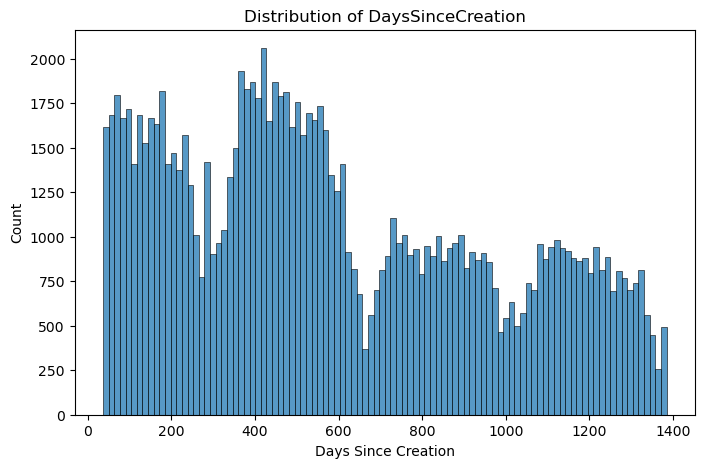

In [27]:
# Plot the distribution of DaysSinceCreation
plt.figure(figsize=(8,5))
sns.histplot(data['DaysSinceCreation'], bins=100, kde=False) # the graphs spams 1349 days, so each bar represents ~13 days.
plt.title('Distribution of DaysSinceCreation')
plt.xlabel('Days Since Creation')
plt.ylabel('Count')
plt.show()

In [28]:
# check for correlation between DaysSinceCreation and other columns
data.select_dtypes(include=[np.number]).corr()['DaysSinceCreation'].sort_values(ascending=False)

DaysSinceCreation       1.000000
BookingsCheckedIn       0.268700
PersonsNights           0.231765
RoomNights              0.228442
AverageLeadTime         0.154132
Age                     0.126641
OtherRevenue            0.119417
TotalRevenue            0.116097
LodgingRevenue          0.100373
BookingsCanceled        0.017451
BookingsNoShowed        0.015032
SRHighFloor             0.013608
SRMediumFloor           0.006044
SRAwayFromElevator      0.005122
SRAccessibleRoom        0.003584
SRShower               -0.000888
SRLowFloor             -0.001020
SRNearElevator         -0.002237
SRBathtub              -0.011139
SRNoAlcoholInMiniBar   -0.012617
SRQuietRoom            -0.031401
SRKingSizeBed          -0.045758
SRCrib                 -0.051906
SRTwinBed              -0.067794
Name: DaysSinceCreation, dtype: float64

## AverageLeadTime

**Definition:** This represents the average number of days before the arrival date that a customer makes a booking. <br>
**Relevance:** Helps identify customer booking behavior. <br>
        Short lead time: Could indicate last-minute or business travelers <br>
        Long lead time: Often linked to vacationers or planned trips 


Insights:
- No missing values; 
- Statistical insights: Average lead time is ~60days, however with a std of 85 this suggest a big variation in booking behaviors.
- There are negative values, which is invalid (lead time should not be negative)
- Percentiles <br>
25% (Q1): 0 days → At least 25% of customers book on the same day (last-minute bookings).<br>
50% (Median): 21 days → Half of the customers book at least 3 weeks in advance.<br>
75% (Q3): 95 days → The top 25% of customers book more than 3 months in advance.



In [29]:
data['AverageLeadTime'].describe()

count    111730.000000
mean         60.834780
std          85.115879
min          -1.000000
25%           0.000000
50%          21.000000
75%          95.000000
max         588.000000
Name: AverageLeadTime, dtype: float64

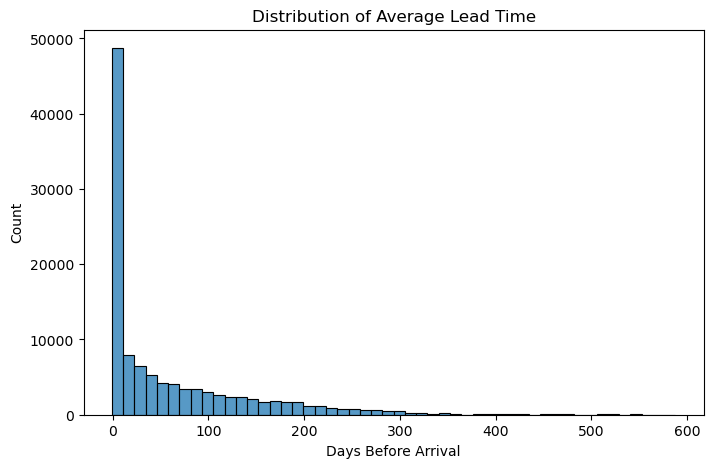

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data['AverageLeadTime'], bins=50)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Days Before Arrival')
plt.ylabel('Count')
plt.show()

In [31]:
# Check the correlation with other variables
data.select_dtypes(include=[np.number]).corr()['AverageLeadTime'].sort_values(ascending=False)

AverageLeadTime         1.000000
PersonsNights           0.389849
RoomNights              0.357555
TotalRevenue            0.285230
BookingsCheckedIn       0.278036
LodgingRevenue          0.259707
Age                     0.257663
OtherRevenue            0.253175
DaysSinceCreation       0.154132
SRTwinBed               0.073907
SRShower                0.005794
SRQuietRoom             0.003556
SRMediumFloor           0.001377
SRLowFloor              0.000131
SRAwayFromElevator     -0.000830
SRAccessibleRoom       -0.000871
SRNearElevator         -0.001843
SRNoAlcoholInMiniBar   -0.007812
SRBathtub              -0.008461
BookingsNoShowed       -0.010501
BookingsCanceled       -0.012608
SRHighFloor            -0.013365
SRKingSizeBed          -0.021482
SRCrib                 -0.044965
Name: AverageLeadTime, dtype: float64

### Fixing negative values

In [32]:
print(f'There are {data[data['AverageLeadTime'] < 0].shape[0]} cases where AverageLeadTime is negative.')
data[data['AverageLeadTime'] < 0]

There are 13 cases where AverageLeadTime is negative.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
23064,PRT,47.0,964,-1,352.00,30.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,382.00
29374,USA,25.0,870,-1,77.49,3.0,0,0,1,3,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,80.49
51375,CHN,33.0,558,-1,129.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,131.00
58655,FRA,57.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
58662,FRA,62.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
58676,FRA,61.0,499,-1,149.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,151.00
60590,ESP,46.0,485,-1,159.00,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,161.00
62690,USA,70.0,468,-1,95.20,2.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,97.20
68486,GBR,46.0,424,-1,282.00,24.0,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,306.00


All bookings are made through “Travel Agent/Operator”. Nationality, DaysSinceCreation and revenue values make this entries look real.
- This suggests that the negative value might result from how the travel agency processes or records bookings.
- It could be a data entry issue where the system logs missing lead times as -1 for specific booking sources.

Action to take: Classify negative values as missing values, and then input them with the median.

In [33]:
# Turn the negative values to NaN
data.loc[data['AverageLeadTime'] < 0, 'AverageLeadTime'] = np.nan

# Fill missing values with median
data['AverageLeadTime'].fillna(data['AverageLeadTime'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_31779/1785307480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AverageLeadTime'].fillna(data['AverageLeadTime'].median(), inplace=True)


## LodgingRevenue

The LodgingRevenue feature represents the total amount of money spent by a customer on lodging. <br>
Understanding this feature can provide insights into customer spending behavior, revenue distribution, and potential segmentation for marketing strategies.

Insights:
- No missing values;
- The high std (379) suggests large variation in spending.
- Number of customers with zero lodging revenue: 33766


Dealing with high volume of zeros:
Create a binary variable "LodgeSpent" where 0 is no, and 1 is yes. This variable will contribute to understand how many active customers we have, and how many have just registered but never spent with us.

In [34]:
# Check for missing values
data['LodgingRevenue'].isnull().sum()

0

In [35]:
data['LodgingRevenue'].describe()

count    111730.000000
mean        283.858905
std         379.133793
min           0.000000
25%           0.000000
50%         208.000000
75%         393.300000
max       21781.000000
Name: LodgingRevenue, dtype: float64

In [36]:
data['LodgingRevenue'].median()

208.0

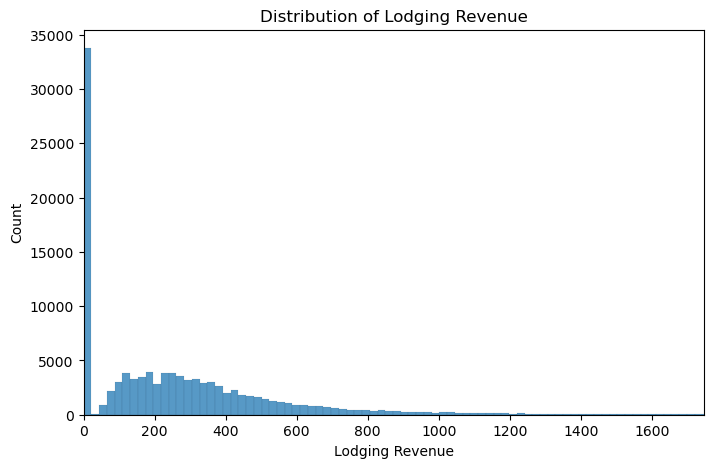

In [37]:
#Visualize the distribution
plt.figure(figsize=(8,5))
sns.histplot(data['LodgingRevenue'], bins=1000)
plt.title('Distribution of Lodging Revenue')
plt.xlabel('Lodging Revenue')
plt.ylabel('Count')
plt.xlim(0, data['LodgingRevenue'].quantile(0.99))  # Limiting to 99th percentile to avoid extreme outliers
plt.show()

In [38]:
zero_revenue_customers = data[data['LodgingRevenue'] == 0]
print(f"Number of customers with zero lodging revenue: {len(zero_revenue_customers)}")

Number of customers with zero lodging revenue: 33766


In [39]:
# Check the distribution of zero revenue customers by DistributionChannel
zero_revenue_customers['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    27270
Direct                    6129
Corporate                  328
GDS Systems                 39
Name: count, dtype: int64

In [40]:
# what are the top10 biggest spenders by lodging revenue
top10_spenders = data['LodgingRevenue'].nlargest(10)
top10_spenders

ID
2757      21781.00
105702    14044.80
23967      9682.40
42504      9665.66
38718      9180.00
73434      9010.00
2160       8493.65
36468      7902.00
13453      7458.00
80036      7256.00
Name: LodgingRevenue, dtype: float64

In [41]:
# Create binary varaible LodgeSpent
data['LodgeSpent'] = (data['LodgingRevenue'] > 0).astype(int)

In [42]:
data['LodgeSpent'].value_counts()

LodgeSpent
1    77964
0    33766
Name: count, dtype: int64

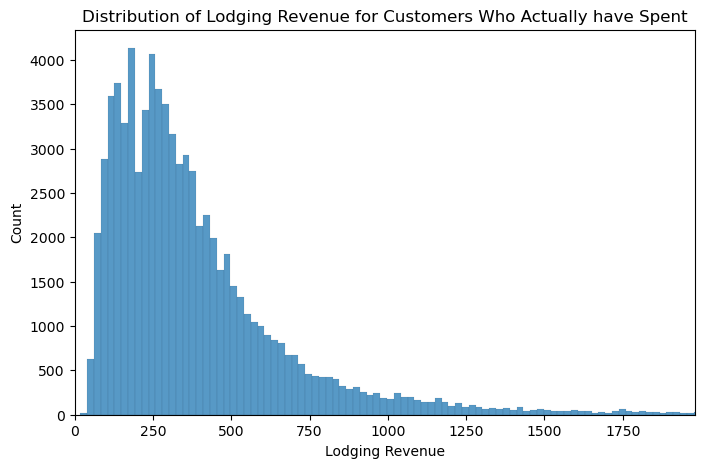

In [43]:
# Filter the data for customers who actually spent on lodging
spent_data = data[data['LodgeSpent'] == 1]

# Visualize the distribution of LodgingRevenue for customers who spent
plt.figure(figsize=(8,5))
sns.histplot(spent_data['LodgingRevenue'], bins=1000)
plt.title('Distribution of Lodging Revenue for Customers Who Actually have Spent')
plt.xlabel('Lodging Revenue')
plt.ylabel('Count')
plt.xlim(0, spent_data['LodgingRevenue'].quantile(0.99))  # Limiting to 99th percentile to avoid extreme outliers
plt.show()

## OtherRevenue

The OtherRevenue feature represents the total amount spent by a customer on non-lodging services such as food, beverages, spa, or additional hotel services. Understanding this feature can reveal customer spending behavior, service utilization, and revenue contribution beyond room bookings.


Insights:
- No missing values;
- There are 33549 customers who did not spend on other hotel services.

In [44]:
data['OtherRevenue'].describe()

count    111730.000000
mean         64.684539
std         123.581919
min           0.000000
25%           0.000000
50%          31.000000
75%          84.000000
max        8859.250000
Name: OtherRevenue, dtype: float64

In [45]:
data['OtherRevenue'].median()

31.0

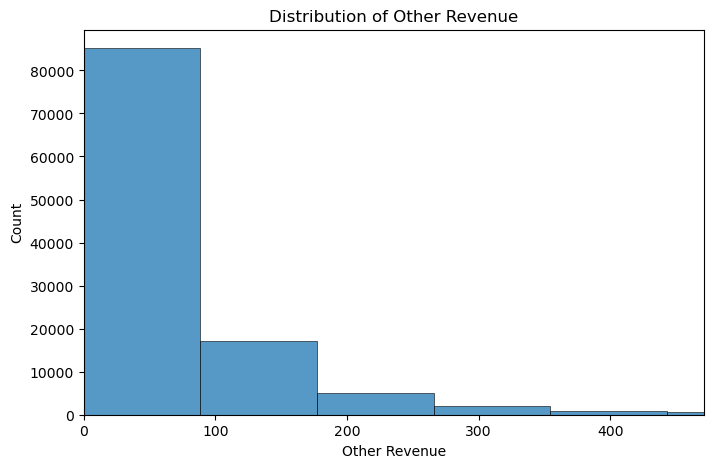

In [46]:
# Visualize the distribution of OtherRevenue
plt.figure(figsize=(8,5))
sns.histplot(data['OtherRevenue'], bins=100)
plt.title('Distribution of Other Revenue')
plt.xlabel('Other Revenue')
plt.ylabel('Count')
plt.xlim(0, data['OtherRevenue'].quantile(0.99))  # Limiting to 99th percentile to avoid extreme outliers
plt.show()

In [47]:
# Check number of customers with zero other revenue
zero_OtherRevenue_customers = data[data['OtherRevenue'] == 0]
print(f"Number of customers with zero other revenue: {len(zero_OtherRevenue_customers)}")

Number of customers with zero other revenue: 33549


In [48]:
# Create binary varaible OtherSpent
data['OtherSpent'] = (data['OtherRevenue'] > 0).astype(int)

In [49]:
data['OtherSpent'].value_counts()

OtherSpent
1    78181
0    33549
Name: count, dtype: int64

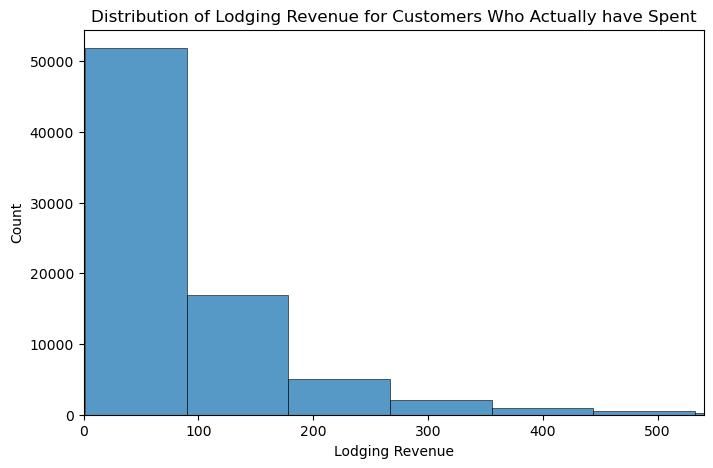

In [50]:
# Filter the data for customers who actually spent on other
otherspent_data = data[data['OtherSpent'] == 1]

# Visualize the distribution of OtherRevenue for customers who spent
plt.figure(figsize=(8,5))
sns.histplot(otherspent_data['OtherRevenue'], bins=100)
plt.title('Distribution of Lodging Revenue for Customers Who Actually have Spent')
plt.xlabel('Lodging Revenue')
plt.ylabel('Count')
plt.xlim(0, otherspent_data['OtherRevenue'].quantile(0.99))  # Limiting to 99th percentile to avoid extreme outliers
plt.show()

In [51]:
print(f'There are {data['OtherSpent'].value_counts()[0]} customers who did not spend on other hotel services.')

There are 33549 customers who did not spend on other hotel services.


## BookingsCanceled

The BookingsCanceled feature represents the number of times a customer has made a booking but later canceled it. Understanding this feature is critical for customer behavior analysis, revenue forecasting, and fraud detection.

This variable is important because canceled bookings mean lost potential revenue, especially if the room remains unoccupied. Plus, high cancellation rates make it difficult for hotels to predict occupancy and revenue, which affects budgeting and operational planning.

Insights:
- No missing values
- There are 166 customers who have canceled bookings, this corresponds to 0.15% of customers. Among them, they have canceled a total of 255 bookings.
- The presence of a single customer canceling 15 times suggests potential fraudulent behavior or misuse of flexible cancellation policies. 

Business actionables:
Frequent cancellations might indicate unreliable customers or pricing sensitivity. So understanding the profiles of customers who cancel frequently (e.g., business vs. leisure travelers) can help in designing targeted retention strategies.

In [52]:
data.sample(5)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,LodgeSpent,OtherSpent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27651,DEU,59.0,893,50.0,268.20,34.0,0,0,1,4,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,1,302.20,1,1
85810,FRA,57.0,259,1.0,107.00,34.0,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,141.00,1,1
76702,USA,67.0,365,99.0,367.38,152.0,0,0,2,8,4,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,1,0,0,0,0,0,519.38,1,1
105191,NLD,54.0,88,78.0,382.60,144.5,0,0,1,12,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,527.10,1,1
70762,IRL,34.0,409,83.0,397.00,45.5,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,442.50,1,1


In [53]:
data['BookingsCanceled'].describe()

count    111730.000000
mean          0.002282
std           0.080633
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: BookingsCanceled, dtype: float64

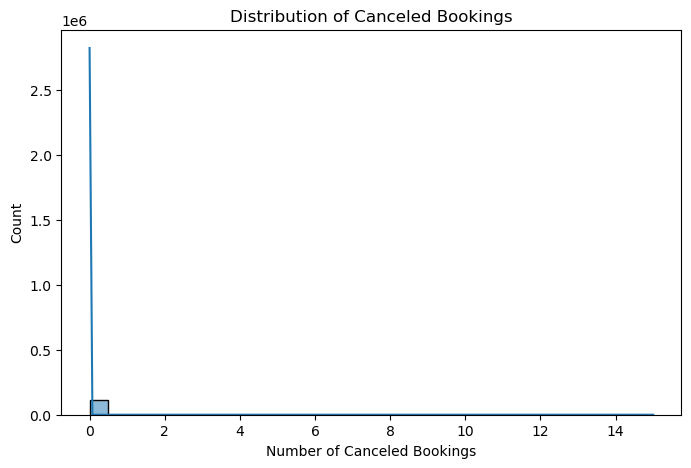

In [54]:
# Checking Distribution & Outliers
plt.figure(figsize=(8,5))
sns.histplot(data['BookingsCanceled'], bins=30, kde=True)
plt.title('Distribution of Canceled Bookings')
plt.xlabel('Number of Canceled Bookings')
plt.ylabel('Count')
plt.show()

In [55]:
# count how many customers have canceled bookings
canceled_bookings = data[data['BookingsCanceled'] > 0]
percentage_canceled = (len(canceled_bookings) / len(data)) * 100

# Sum the number of canceled bookings
total_canceled = data['BookingsCanceled'].sum()

print(f'There are {len(canceled_bookings)} customers who have canceled bookings, this corresponds to {round(percentage_canceled,2)}% of customers. Among them, they have canceled a total of {total_canceled} bookings.')

There are 166 customers who have canceled bookings, this corresponds to 0.15% of customers. Among them, they have canceled a total of 255 bookings.


In [56]:
# Sum the number of canceled bookings
total_canceled = data['BookingsCanceled'].sum()
print(f'The total number of canceled bookings is {total_canceled}.')

The total number of canceled bookings is 255.


In [57]:
# verify customers with more than 5 canceled bookings
data[data['BookingsCanceled'] > 5]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,LodgeSpent,OtherSpent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11481,PRT,59.0,1169,3.0,195.75,87.0,15,0,76,99,88,Direct,Complementary,0,0,0,0,0,0,0,1,0,0,0,0,0,282.75,1,1
43906,PRT,53.0,636,23.0,1782.00,304.6,7,0,24,26,26,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,2086.60,1,1


1. Customer 11481 (High Cancellations, Low Revenue)
- Possible policy abuse: Given the complementary segment, this customer may be taking advantage of a loyalty program or promotional free stays.
- Booking behavior: High cancellations combined with low revenue contribution makes this customer an operational challenge.
- Recommendation: Introduce stricter cancellation policies for complementary stays or limit last-minute booking flexibility.

2. Customer 43906 (Corporate, Moderate Cancellations, High Revenue)
- Corporate travelers often cancel when business plans change.
- Revenue justification: Despite 7 cancellations, this customer still brings significant revenue (€2086.60).
- Recommendation: Offer flexible rebooking options for corporate clients instead of strict cancellation fees, as they are still valuable to the hotel.

## BookingsNoShowed


Insights:
- There are 57 customers who have not shown up for at least one booking, this corresponds to 0.05% of customers. Among them they have not shown up for a total of 67 bookings.
- Out of the 57 customers who have not shown up for at least one booking, PRT is the most common nationality with 42 no-shows.

The analysis of no-show customers highlights key management concerns. While no-shows reduce operational costs, they also limit revenue opportunities from upselling and additional services. Most no-show customers are middle-aged (51 years on average) and long-time clients, with many still regularly checking in (9 stays on average).

Booking behavior is unpredictable, with lead times ranging from last-minute (0-4 days) to over 100 days. The majority of no-shows occur once per customer, but some repeat offenders exist (up to 3 no-shows per person). Portugal (PRT) accounts for most no-shows (42 out of 57 customers), indicating nationality-based trends.

Financially, no-show customers remain valuable, with a median lodging revenue of €783 and some spending over €8,000. Many prefer luxury stays (61% request king-size beds) and long-term bookings (up to 116 nights), reinforcing that corporate and high-spending guests contribute to no-show trends.

To mitigate risks, hotels should adjust overbooking strategies based on predictable no-shows, implement stricter policies for last-minute bookings, and use targeted deposits for repeat offenders. A predictive approach, analyzing lead time, nationality, and past behavior, can help optimize revenue while maintaining customer satisfaction.

In [58]:
noshow_customers[['BookingsNoShowed','LodgingRevenue','OtherRevenue','TotalRevenue']].sample(5)

NameError: name 'noshow_customers' is not defined

In [ ]:
# Count the number of customers with at least one NoShow
noshow_customers = data[data['BookingsNoShowed'] > 0]
percentage_noshow = (len(noshow_customers) / len(data)) * 100
total_noshow = data['BookingsNoShowed'].sum()

print(f'There are {len(noshow_customers)} customers who have not shown up for at least one booking, this corresponds to {round(percentage_noshow,2)}% of customers. Among them they have not shown up for a total of {noshow_customers["BookingsNoShowed"].sum()} bookings.')

In [ ]:
noshow_customers.sample(10)

In [ ]:
# group customer with no show by nationality
noshow_nationalities = noshow_customers['Nationality'].value_counts()

# nationality is in noshow_nationalities.index[0]
# count is in noshow_nationalities[0]
print(
    f"Out of the {len(noshow_customers)} customers who have not shown up "
    f"for at least one booking, {noshow_nationalities.index[0]} is the most common nationality "
    f"with {noshow_nationalities[0]} no-shows."
)


In [ ]:
noshow_nationalities

In [ ]:
noshow_customers[['BookingsNoShowed','LodgingRevenue','OtherRevenue','TotalRevenue']].sample(10)

In [ ]:
noshow_customers.describe().T

## BookingsCheckedIn

- Customers with more than 30 checkins seem to be outliers

In [59]:
data.sample(5)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,LodgeSpent,OtherSpent
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51295,GBR,52.0,559,96.0,244.2,82.0,0,0,1,4,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,1,0,0,0,0,326.2,1,1
33094,ITA,40.0,815,182.0,332.1,47.0,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,379.1,1,1
28879,PRT,48.0,876,11.0,98.0,7.0,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,105.0,1,1
29016,GBR,71.0,875,14.0,732.0,64.0,0,0,1,8,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,796.0,1,1
70226,FRA,29.0,412,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0


In [60]:
data['BookingsCheckedIn'].describe()

count    111730.000000
mean          0.737626
std           0.730889
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          76.000000
Name: BookingsCheckedIn, dtype: float64

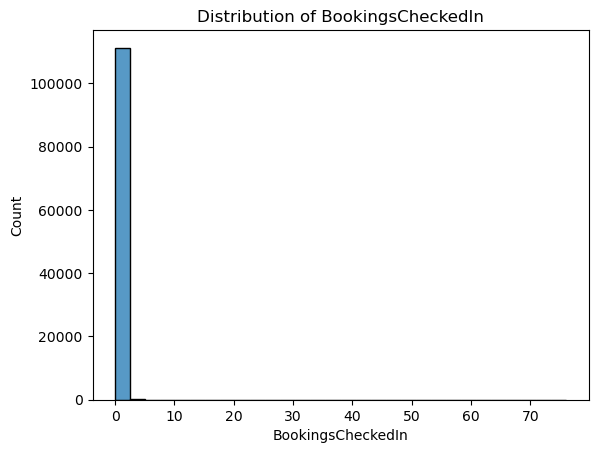

In [80]:
# Check initial distribution
sns.histplot(data['BookingsCheckedIn'], bins=30)
plt.title("Distribution of BookingsCheckedIn")
plt.show()


In [63]:
# Create a feature called ActiveMembers where ActiveMembers = 1 if BookingsCheckedIn > 0, else 0
data['ActiveMembers'] = (data['BookingsCheckedIn'] > 0).astype(int)

In [65]:
# Check number of active and inactive members
data['ActiveMembers'].value_counts()

ActiveMembers
1    78535
0    33195
Name: count, dtype: int64

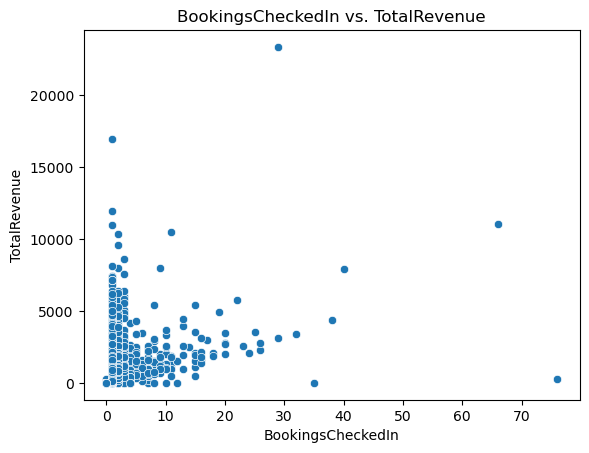

In [72]:
# Check the relationship with TotalRevenue
sns.scatterplot(x=data['BookingsCheckedIn'], y=data['TotalRevenue'])
plt.title("BookingsCheckedIn vs. TotalRevenue")
plt.show()

In [79]:
# check customers with BookingsCheckedIn>30
print(f'There are {data[data["BookingsCheckedIn"] > 30].shape[0]} customers with more than 30 bookings checked in.')
data[data['BookingsCheckedIn'] > 30]

There are 6 customers with more than 30 bookings checked in.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,LodgeSpent,OtherSpent,ActiveMembers
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2160,PRT,48.0,1323,20.0,8493.65,2587.5,3,1,66,75,95,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,11081.15,1,1,1
3776,PRT,41.0,1295,6.0,3910.00,433.5,2,1,38,42,42,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,4343.50,1,1,1
6676,PRT,24.0,1245,3.0,2615.00,820.6,2,2,32,42,33,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,3435.60,1,1,1
11481,PRT,59.0,1169,3.0,195.75,87.0,15,0,76,99,88,Direct,Complementary,0,0,0,0,0,0,0,1,0,0,0,0,0,282.75,1,1,1
12953,PRT,51.0,1147,21.0,6991.00,957.0,0,2,40,116,116,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,7948.00,1,1,1
71788,PRT,48.0,401,16.0,0.00,26.0,1,0,35,80,39,Direct,Complementary,0,0,0,0,0,0,0,1,1,0,0,0,0,26.00,0,1,1


In [83]:
inactive_customers = data[data['BookingsCheckedIn'] == 0]
inactive_customers.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,LodgeSpent,OtherSpent,ActiveMembers
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0
5,FRA,52.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0
7,JPN,50.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0
9,FRA,43.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,0
11,IRL,28.0,1385,0.0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0


# Multivariate analysis

## Revenue per nationality

In [ ]:
# Get the top 20 nationalities with the highest lodging revenue
top20_nationalities_lodging = data.groupby('Nationality')['LodgingRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_lodging

In [ ]:
# Get the top 20 nationalities with the highest other revenue
top20_nationalities_other = data.groupby('Nationality')['OtherRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_other

In [ ]:
# Get the top 10 nationalities with the highest TotalRevenue
top20_nationalities_total = data.groupby('Nationality')['TotalRevenue'].sum().sort_values(ascending=False).head(20)
top20_nationalities_total

In [ ]:
# Set up positions for the bars
y_positions = np.arange(len(top20_nationalities_total))  # Get indices for nationalities

# Compute the proportions for Lodging and Other Revenue
lodging_percentage = (top20_nationalities_lodging / top20_nationalities_total) * 100
other_percentage = (top20_nationalities_other / top20_nationalities_total) * 100

# Create the plot
plt.figure(figsize=(12, 8))

# Plot stacked horizontal bars
plt.barh(y_positions, top20_nationalities_lodging, color='forestgreen', label='Lodging Revenue')
plt.barh(y_positions, top20_nationalities_other, left=top20_nationalities_lodging, color='mediumseagreen', label='Other Revenue')

# Add percentage labels inside the bars
for i, (lodging, other, total) in enumerate(zip(lodging_percentage, other_percentage, top20_nationalities_total)):
    plt.text(total * 0.05, y_positions[i], f"{lodging:.1f}%", va='center', color='white', fontsize=10)  # Lodging %
    plt.text(lodging + (total * 0.05), y_positions[i], f"{other:.1f}%", va='center', color='white', fontsize=10)  # Other %

# Customize the plot
plt.yticks(y_positions, top20_nationalities_total.index)  # Set y-ticks to nationalities
plt.xlabel("Revenue Amount")
plt.ylabel("Nationality")
plt.title("Top 20 Nationalities by Total Revenue (Stacked)")
plt.legend()

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Show plot
plt.show()

In [ ]:
# Set up positions for the bars
y_positions = np.arange(len(top20_nationalities_total))  # Get indices for nationalities

# Compute the proportions for Lodging and Other Revenue
lodging_percentage = (top20_nationalities_lodging / top20_nationalities_total) * 100
other_percentage = (top20_nationalities_other / top20_nationalities_total) * 100

# Create the plot
plt.figure(figsize=(12, 8))

# Plot stacked horizontal bars
plt.barh(y_positions, top20_nationalities_lodging, color='forestgreen', label='Lodging Revenue')
plt.barh(y_positions, top20_nationalities_other, left=top20_nationalities_lodging, color='mediumseagreen', label='Other Revenue')

# Add percentage labels **outside** the bars
for i, (lodging, other, total) in enumerate(zip(lodging_percentage, other_percentage, top20_nationalities_total)):
    plt.text(total + (total * 0.02), y_positions[i], f"{lodging:.1f}% | {other:.1f}%", 
             va='center', ha='left', color='black', fontsize=10, fontweight='bold')  # Labels outside

# Customize the plot
plt.yticks(y_positions, top20_nationalities_total.index)  # Set y-ticks to nationalities
plt.xlabel("Revenue Amount")
plt.ylabel("Nationality")
plt.title("Top 20 Nationalities by Total Revenue (Stacked)")
plt.legend()

# Invert y-axis for better readability
plt.gca().invert_yaxis()

# Show plot
plt.show()